In [13]:
import matplotlib.pyplot as plt
import numpy as np
import json
import ndjson
import io
from tqdm import tqdm
from PIL import Image

In [20]:
data_dir = './gan_resources/gan_data'
with open(f'{data_dir}/full_simplified_envelope.ndjson') as f:
    data = ndjson.load(f)

In [21]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

preprocessed_images = []
for i in tqdm(range(5000)):
# for i in tqdm(range(1)):
    plt.axis('off')
    for x_points, y_points in data[i]['drawing']:
        # reorient the points
        flipped_y_points = -np.asarray(y_points) + 255
        plt.plot(x_points, flipped_y_points, linewidth=25, color='black')

    canvas = FigureCanvas(plt.gcf())

    canvas.draw()       # draw the canvas, cache the renderer

    width, height = plt.gcf().get_size_inches() * plt.gcf().get_dpi()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)

    im = Image.fromarray(255 - image[:,:,0])
    resized = im.resize((28,28))
    preprocessed_images.append(np.array(resized))

    plt.clf()    

100%|██████████| 5000/5000 [01:15<00:00, 66.55it/s]


<Figure size 432x288 with 0 Axes>

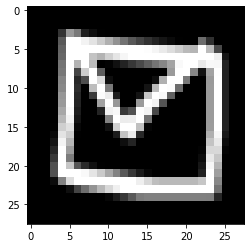

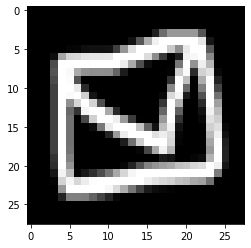

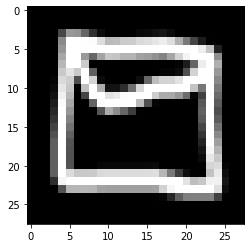

In [22]:
for i in range(4,7):        
    plt.imshow(preprocessed_images[i], cmap='gray')
    plt.show()

In [12]:
good_apple_index = []
for i, im in enumerate(preprocessed_images):
    # number of white pixels
    if (np.sum(im == 255) <= 125 and np.sum(im == 255) >= 85):
        good_apple_index.append(i)
        
    # plt.imshow(preprocessed_images[i])
    # plt.show()
print(len(good_apple_index))
good_apples = np.asarray(preprocessed_images)[good_apple_index]

processed_dir = './gan_resources/gan_data'
np.save(f'{processed_dir}/good_envelopes_images.npy', preprocessed_images)

4089


My attempt to reduce dissimilar images

In [19]:
good_apple_index = []
for i, im in enumerate(preprocessed_images):
    # number of white pixels
    if (np.sum(im == 255) <= 85 and np.sum(im == 255) >= 50):
        good_apple_index.append(i)
        
print(len(good_apple_index))
good_apples = np.asarray(preprocessed_images)[good_apple_index]
np.save(f'{processed_dir}/good_apples_images.npy', preprocessed_images)

1851


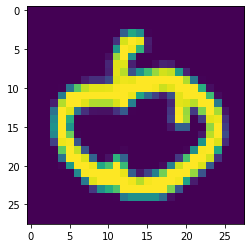

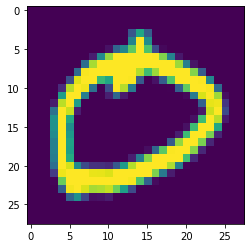

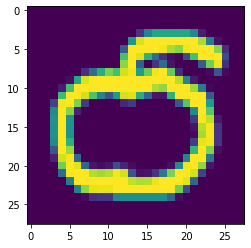

In [22]:
for i in range(4,7):        
    plt.imshow(good_apples[i])
    plt.show()